# Benjamin Norton

## Research question/interests

Briefly describe your research question or interests here.

### Interest

I plan to investigate the relationship between probable asteroid impacts and asteroid size. I want to investigate this because asteroids of different sizes can have varying levels of potential damage to the earth. A large asteroid has a higher potential for destruction and can cause widespread damage. In contrast, a smaller one may burn up upon entering the earth's atmosphere or land in a remote area. I plan to see if there are any correlations in this dataset and see if I can use that information to predict future impacts.
<br>
### Research question
**Can we identify potentially hazardous asteroids (PHAs) based on their orbital parameters and physical characteristics?**
<br>
In order to answer this question I will first remove any duplicate or irrelevant data, fill in any missing values, and standardize units and formats across all variables and then merge the datasets into a single dataframe with the object name as the key.
<br>
I will then use the orbit axis, eccentricity, inclination, perihelion argument, node longitude, and other parameters to classify asteroids into different groups based on their likelihood of colliding with Earth (I can also use the impact data cumulative collision probability). I will then look at the asteroid diameter, velocity, and magnitude to estimate the potential impact energy and damage, thus, determining the PHA status of the asteroid.
<br>

## Load Data

In [1]:
import pandas as pd
import re

impacts = pd.read_csv("../data/raw/impacts.csv")
orbits = pd.read_csv("../data/raw/orbits.csv")
NEO = pd.read_csv("../data/raw/NEO_Earth_Close_Approaches.csv")

## Data cleaning

In [2]:
impacts = impacts.drop_duplicates()
impacts = impacts.dropna()
impacts = impacts.reset_index(drop=True)

orbits = orbits.drop_duplicates()
orbits = orbits.dropna()
# remove non-breaking spaces
orbits = orbits.replace("\xa0", " ", regex=True)
orbits = orbits.reset_index(drop=True)

NEO = NEO.drop_duplicates()
NEO = NEO.dropna()
NEO = NEO.replace("\xa0", " ", regex=True)
if "Object" in NEO:
    NEO["Object Name"] = NEO["Object"].str.strip()
    NEO = NEO.drop(columns=["Object"])
NEO = NEO.reset_index(drop=True)

# remove whitespace from ends of object names
impacts["Object Name"] = impacts["Object Name"].str.strip()
orbits["Object Name"] = orbits["Object Name"].str.strip()

# replace names in impacts and orbits that match `Name (Year String)` with `Year String`
# ie 101955 Bennu (1999 RQ36) -> 1999 RQ36
pattern = r'.*\((.*)\)'
impacts['Object Name'] = impacts['Object Name'].apply(lambda x: re.sub(pattern, r'\1', x))
orbits['Object Name'] = orbits['Object Name'].apply(lambda x: re.sub(pattern, r'\1', x))
NEO['Object Name'] = NEO['Object Name'].apply(lambda x: re.sub(pattern, r'\1', x))

## Cleaned Data Export

In [3]:
impacts.to_csv("../data/processed/impacts.csv", index=False)
orbits.to_csv("../data/processed/orbits.csv", index=False)
NEO.to_csv("../data/processed/NEO_Earth_Close_Approaches.csv", index=False)

## Data Merging

Exporting the data merged such that each row is a unique asteroid with relevant data from the impacts and orbits datasets. This will be the main dataset used for analysis.

In [4]:
impacts = pd.read_csv("../data/processed/impacts.csv")
orbits = pd.read_csv("../data/processed/orbits.csv")
NEO = pd.read_csv("../data/processed/NEO_Earth_Close_Approaches.csv")

asteroids = pd.merge(orbits, NEO, on="Object Name", how='right')
asteroids.dropna(subset=["Object Classification"], inplace=True) # remove rows with no classification (ie no orbit data)
asteroids.drop_duplicates(subset=["Object Name"], inplace=True) # remove duplicate rows
asteroids = asteroids.reset_index(drop=True)

asteroids.to_csv("../data/processed/asteroids.csv", index=False)

================================================================
## Load Merge Data for Exploratory Data Analysis

Loading the merged data for analysis, separate from the data cleaning process.

Text(0.5, 1.05, 'Perihelion Distance vs Relative Velocity')

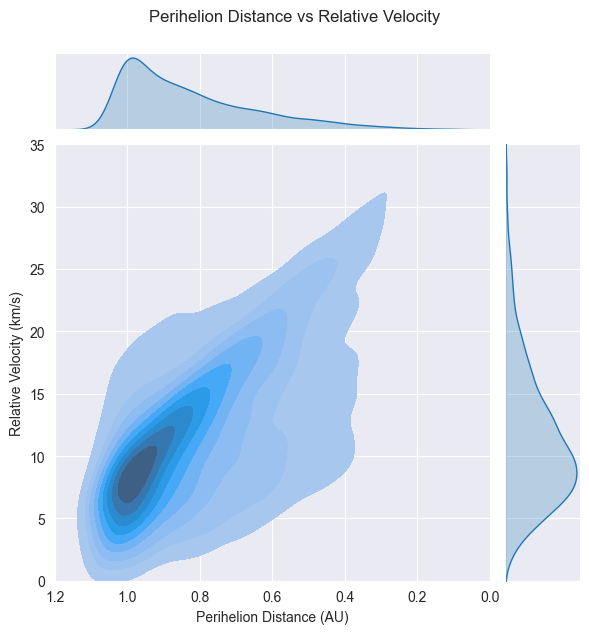

In [5]:
import pandas as pd
import seaborn as sns

asteroids = pd.read_csv("../data/processed/asteroids.csv")

perihelion_dist = asteroids["Perihelion Distance (AU)"]
relative_velocity = asteroids["V relative(km/s)"]

# plot perihelion distance vs velocity as a heatmp, flip the x axis
ax = sns.jointplot(x=perihelion_dist, y=relative_velocity, kind="kde", fill=True, xlim=(0, 1.2), ylim=(0, 35))
ax.fig.axes[0].invert_xaxis()
ax.set_axis_labels("Perihelion Distance (AU)", "Relative Velocity (km/s)")
ax.fig.suptitle("Perihelion Distance vs Relative Velocity", y=1.05)

This heat map shows that the relative velocity of asteroids is highest when they are closest to the sun (perihelion distance). This makes sense because the closer an asteroid is to the sun, the faster it is moving. This is because the sun's gravity is pulling the asteroid towards it, increasing its velocity.

Text(0.5, 1.0, 'Orbit Axis vs Orbital Period')

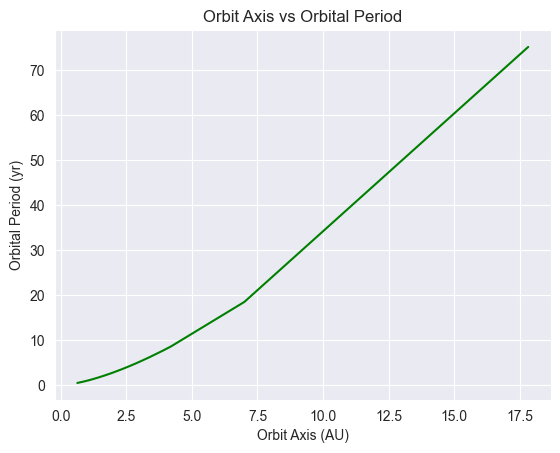

In [26]:
orbit_year = asteroids["Orbital Period (yr)"]
orbit_axis = asteroids["Orbit Axis (AU)"]

# plot orbit year vs orbit axis as a line plot
ax = sns.lineplot(x=orbit_axis, y=orbit_year, color="green")
ax.set_xlabel("Orbit Axis (AU)")
ax.set_ylabel("Orbital Period (yr)")
ax.set_title("Orbit Axis vs Orbital Period")

This line plot seems to indicate that the orbital period of an asteroid is directly proportional to its orbit axis. This makes sense because the orbit axis is the distance from the center of the sun to the asteroid. The further away the asteroid is from the sun, the longer it takes to orbit the sun.

Text(0.5, 1.05, 'Average Distance vs Asteroid Size')

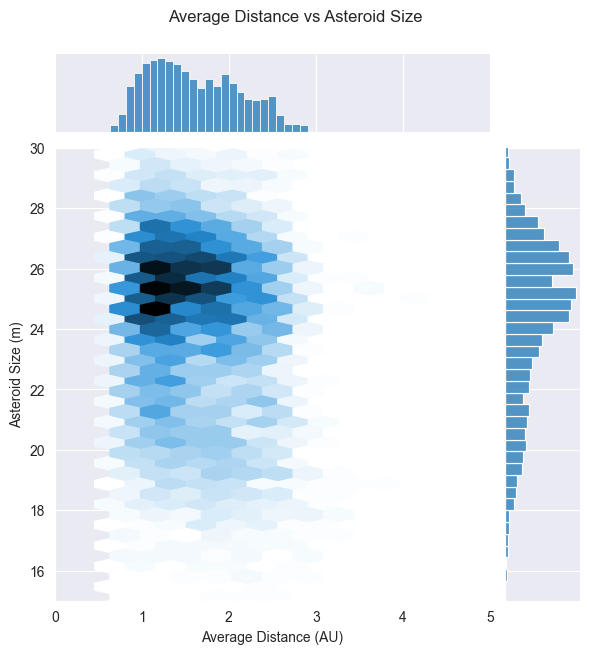

In [43]:
aphelion_dist = asteroids["Aphelion Distance (AU)"]
perihelion_dist = asteroids["Perihelion Distance (AU)"]
average_dist = (aphelion_dist + perihelion_dist) / 2
asteroid_size = asteroids["Asteroid Magnitude"]

# plot average distance vs asteroid size as a hex plot
ax = sns.jointplot(x=average_dist, y=asteroid_size, kind="hex", xlim=(0, 5), ylim=(15, 30))
ax.set_axis_labels("Average Distance (AU)", "Asteroid Size (m)")
ax.fig.suptitle("Average Distance vs Asteroid Size", y=1.05)

The hexplot seems to show that there is a correlation between the distance from the sun to the asteroid and the asteroid's size. The main cluster of size 24-27 meter asteroids are between about 0.7 and 1.6 AU from the sun.